In [1]:
import os.path
from os import makedirs
import cv2
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive 

drive.mount('/content/drive') 

Mounted at /content/drive


In [3]:
save_dir='/content/drive/MyDrive/Problem_2'

x_train = save_dir+'/x_train.pkl'
x_test = save_dir+'/x_test.pkl'
y_train = save_dir+'/y_train.pkl'
y_test = save_dir+'/y_test.pkl'

with open(x_train,'rb') as f:
    x_train = pickle.load(f)
    
with open(x_test,'rb') as f:
    x_test = pickle.load(f)
    
with open(y_train,'rb') as f:
    y_train = pickle.load(f)

with open(y_test,'rb') as f:
    y_test = pickle.load(f)

In [4]:
import pandas as pd
y_test_df = pd.DataFrame(y_test,columns=['Blur','Vignette','Cataract','Shadow'])
y_test_df.head()

,Blur,Vignette,Cataract,Shadow
0,1,0,0,1
1,1,2,1,0
2,0,3,2,0
3,0,0,1,0
4,1,0,0,0


In [16]:
for i in ['Blur','Vignette','Cataract','Shadow']:
  a = max(y_test_df[i].values)
  b = max(y_train_df[i].values)
  maximum = max(a,b)
  print(i,'max' ,maximum )

for i in ['Blur','Vignette','Cataract','Shadow']:
  a = min(y_test_df[i].values)
  b = min(y_train_df[i].values)
  minimum = min(a,b)
  print(i,'min' ,minimum )

Blur max 2
Vignette max 3
Cataract max 2
Shadow max 3
Blur min 0
Vignette min 0
Cataract min 0
Shadow min 0


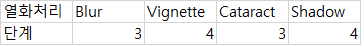

In [5]:
import pandas as pd
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train_df = pd.DataFrame(y_train,columns=['Blur','Vignette','Cataract','Shadow'])
y_test_df = pd.DataFrame(y_test,columns=['Blur','Vignette','Cataract','Shadow'])

In [25]:
x_train.shape

(1612, 100, 100, 3)

#SVM 단순 적용

In [8]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
x_train_flat = x_train.reshape(-1,3*100*100)
x_test_flat = x_test.reshape(-1,3*100*100)
for i in ['Blur','Vignette','Cataract','Shadow']:
  lin_clf = LinearSVC(random_state=42)
  lin_clf.fit(x_train_flat,y_train_df[i])
  y_pred = lin_clf.predict(x_test_flat)
  print(i,accuracy_score(y_test_df[i],y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Blur 0.8861386138613861


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Vignette 0.8985148514851485


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Cataract 0.9727722772277227
Shadow 0.8861386138613861


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [19]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
x_train_flat = x_train.reshape(-1,3*100*100)
x_test_flat = x_test.reshape(-1,3*100*100)
for i in ['Blur','Vignette','Cataract','Shadow']:
  clf = SVC(random_state=42)
  clf.fit(x_train_flat,y_train_df[i])
  y_pred = clf.predict(x_test_flat)
  print(i,accuracy_score(y_test_df[i],y_pred))

Blur 0.5470297029702971
Vignette 0.745049504950495
Cataract 0.7970297029702971
Shadow 0.7301980198019802


1. 데이터 flatten 후, svm 적용


---


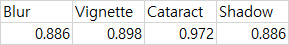

# VGG16 이용

In [43]:
from tensorflow.keras.models import Model
from tensorflow.python.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.python.keras.preprocessing.image import img_to_array

In [47]:
base_model = VGG16(include_top = False,weights='imagenet',input_shape=(100,100,3))
x_vgg16 = base_model.predict(x_train)
x_val_vgg16 = base_model.predict(x_test)

In [48]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0     

In [49]:
x_vgg16_flat = x_vgg16.reshape(-1,3*3*512)
x_val_vgg16_flat = x_val_vgg16.reshape(-1,3*3*512)
for i in ['Blur','Vignette','Cataract','Shadow']:
  lin_clf = LinearSVC(random_state=42)
  lin_clf.fit(x_vgg16_flat,y_train_df[i])
  y_pred = lin_clf.predict(x_val_vgg16_flat)
  print(i,accuracy_score(y_test_df[i],y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Blur 0.9381188118811881


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Vignette 0.9678217821782178


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Cataract 0.9777227722772277
Shadow 0.8712871287128713


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


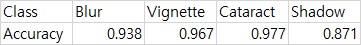

#CNN 이용

In [38]:
from tensorflow.keras.utils import to_categorical

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [59]:
y_encode = to_categorical(y_train_df)
y_val_encode = to_categorical(y_test_df)

In [93]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(100, 100, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Conv2D(1, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(4))

In [92]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 98, 98, 32)        896       
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 96, 96, 64)        18496     
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 48, 48, 64)        0         
_________________________________________________________________
dropout_48 (Dropout)         (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 46, 46, 64)        36928     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_49 (Dropout)         (None, 23, 23, 64)      

In [96]:
model.compile(loss='mse', optimizer='adam',
            metrics=['accuracy'])
cb_early_stopping = EarlyStopping(monitor='val_loss', patience=7)
history = model.fit(x_train, y_train_df,
                  validation_data=(x_test, y_test_df),
                  epochs=100, batch_size=64, verbose=10,
                  callbacks=[cb_early_stopping])

Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100


In [98]:
history.history['val_loss'][-1]

0.19749665260314941

In [99]:
history.history['loss'][-1]

0.2575145959854126

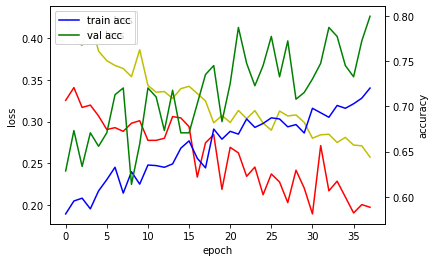

In [97]:
import matplotlib.pyplot as plt

hist = history
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [41]:
def use_cnn(model,x,y,x_val,y_val,n_class):
  model.add(Dense(n_class, activation='softmax'))
  model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
  cb_early_stopping = EarlyStopping(monitor='val_loss', patience=7)
  history = model.fit(x, y,
                    validation_data=(x_val, y_val),
                    epochs=10, batch_size=64, verbose=0,
                    callbacks=[cb_early_stopping])
  print('cnn :', history.history['val_loss'][-1])
  print('cnn :', history.history['loss'][-1])
  return model.get_weights()